In [ ]:
# 데이터 불러오기
# Load data
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jongban2","key":"51ce207a7c8e1e9a4e4f17277436e5ef"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d denkuznetz/housing-prices-regression

Dataset URL: https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression
License(s): apache-2.0
housing-prices-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip housing-prices-regression.zip

Archive:  housing-prices-regression.zip
replace real_estate_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Dataframe형태로 불러오기
# Load data as a DataFrame
import pandas as pd
df = pd.read_csv("real_estate_dataset.csv")
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
# 데이터 파악
# Explore the data
df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [ ]:
# 칼럼별 데이터타입 파악
# Check data types by column
df.dtypes

,0
ID,int64
Square_Feet,float64
Num_Bedrooms,int64
Num_Bathrooms,int64
Num_Floors,int64
Year_Built,int64
Has_Garden,int64
Has_Pool,int64
Garage_Size,int64
Location_Score,float64


In [ ]:
# 칼럼들간의 상관관계 파악
# Inspect correlations between columns
df.corr()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
ID,1.000000,0.051102,0.014511,0.027395,-0.006343,0.028548,-0.005307,-0.076580,-0.000137,-0.045071,-0.006751,0.031774
Square_Feet,0.051102,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
Num_Bedrooms,0.014511,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
Num_Bathrooms,0.027395,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Num_Floors,-0.006343,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
Year_Built,0.028548,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
Has_Garden,-0.005307,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
Has_Pool,-0.076580,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garage_Size,-0.000137,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100
Location_Score,-0.045071,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326


In [ ]:
# 의미없는 칼럼 제외
# Drop irrelevant columns
df.drop("ID", axis=1, inplace=True)
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
# 결측치 처리(이상없으면 그대로)
# Handle missing values (leave as is if none)
df.isnull().sum()

,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0
Distance_to_Center,0


/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

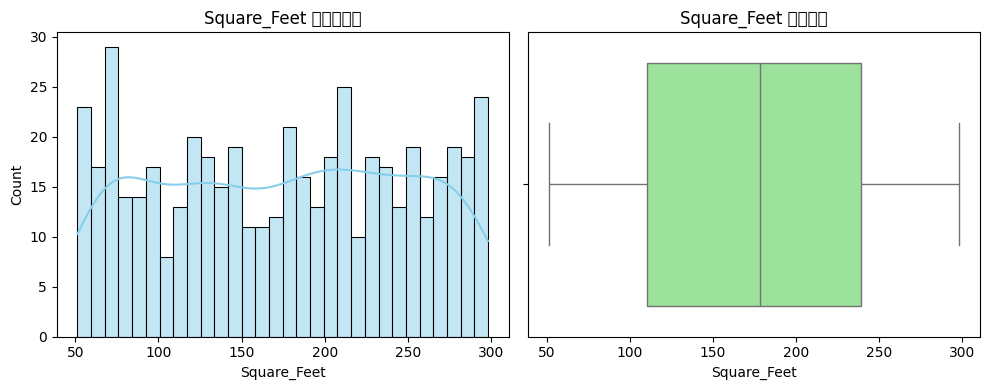

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

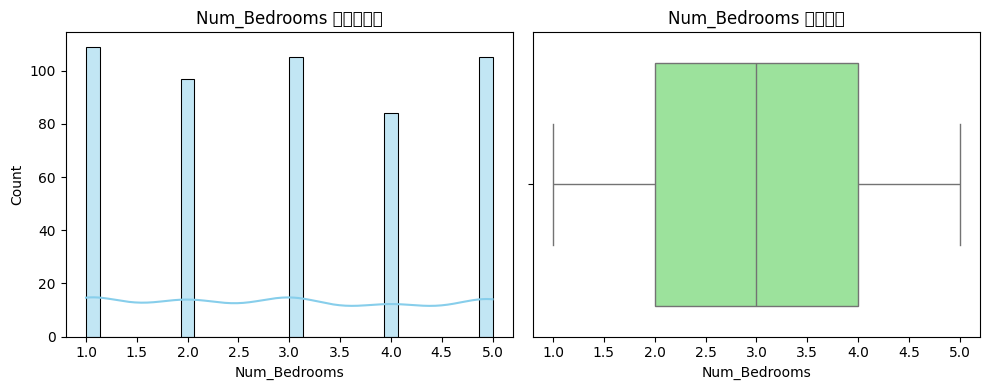

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

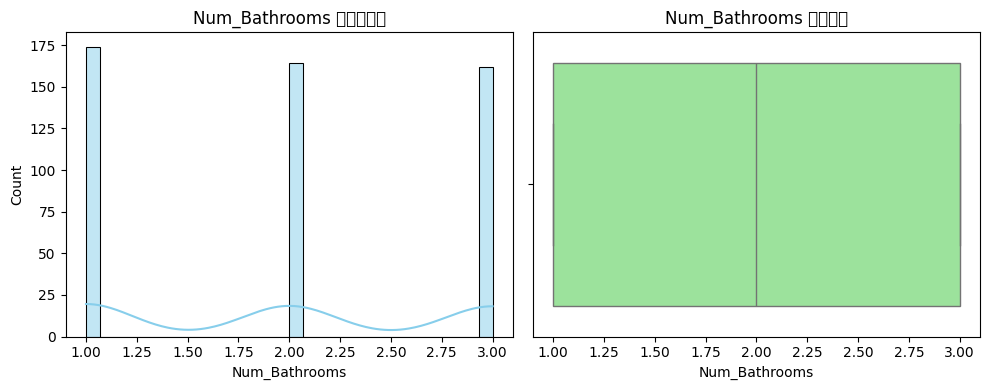

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

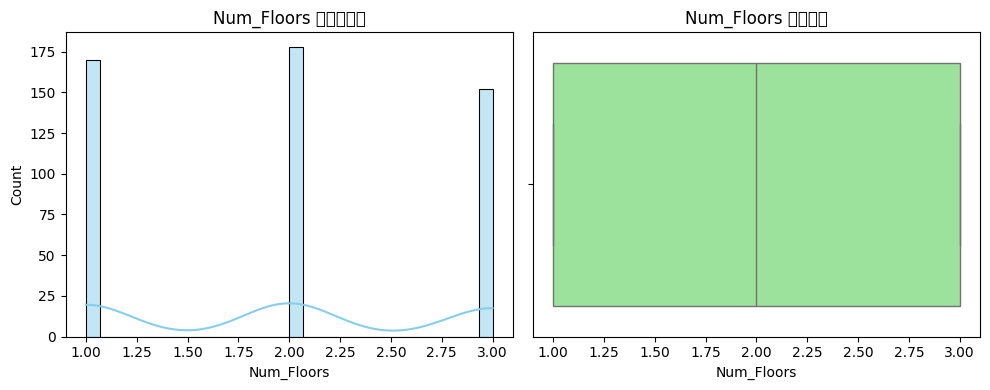

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

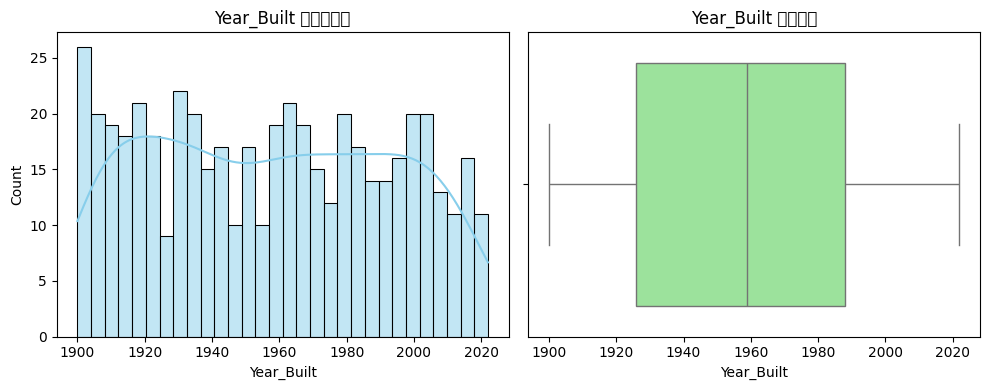

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

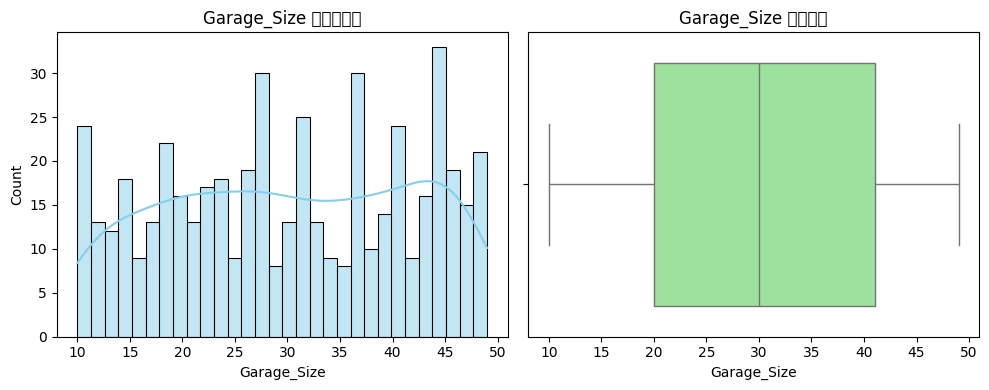

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

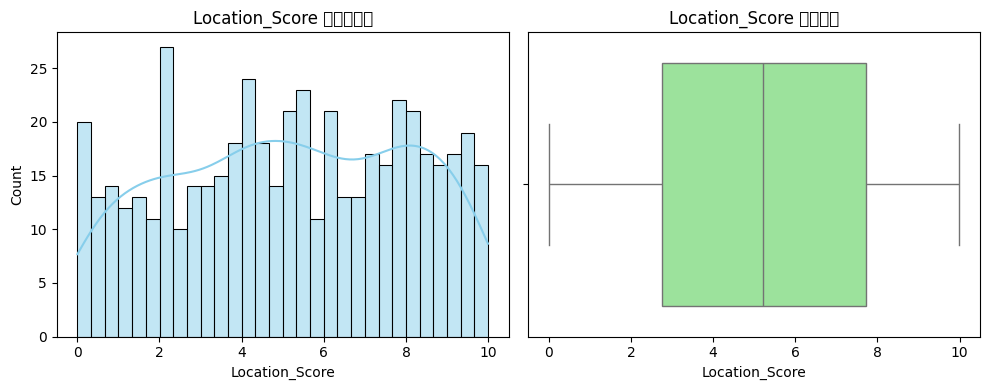

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

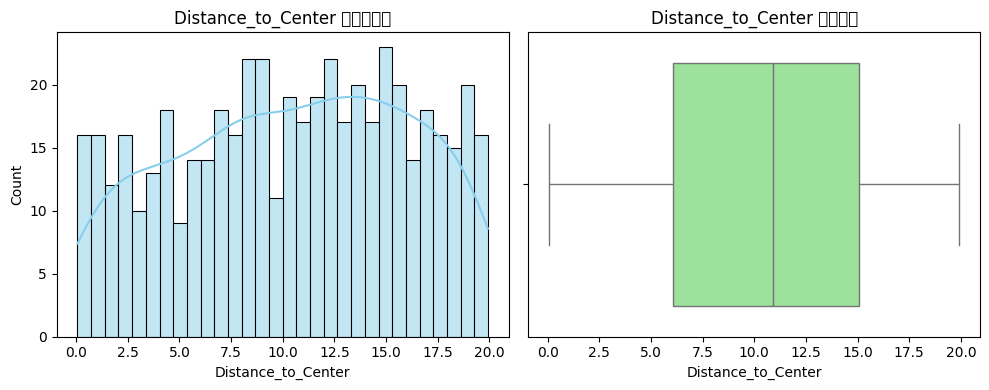

/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3754360635.py:18: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

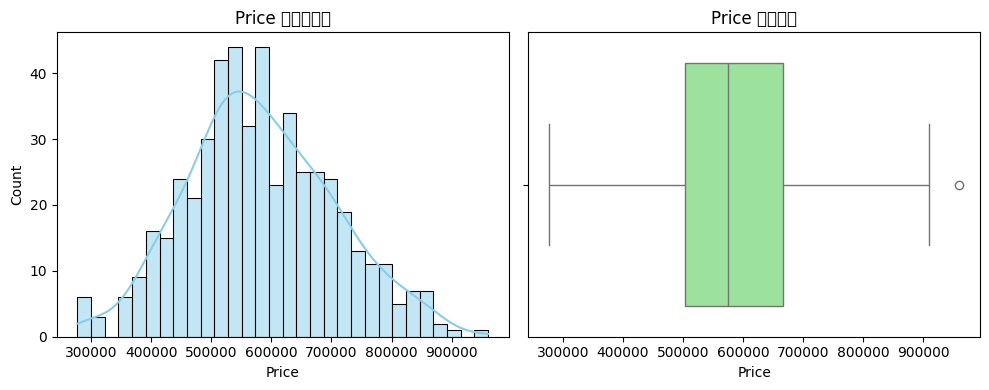

In [ ]:
# 수치형 칼럼 시각화
# Visualize numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['Square_Feet',	'Num_Bedrooms',	'Num_Bathrooms',	'Num_Floors',
                'Year_Built',	'Garage_Size',	'Location_Score',	'Distance_to_Center']

for col in numeric_cols + ['Price']:
  plt.figure(figsize=(10, 4))

  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True, bins=30, color='skyblue')
  plt.title(f'{col} 히스토그램')

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[col], color='lightgreen')
  plt.title(f'{col} 박스플롯')

  plt.tight_layout()
  plt.show()

In [ ]:
# 연도 → 나이(경과 년수)로 변환(스케일링을 위해)
# Convert year to age (elapsed years) for scaling
df['Building_Age'] = 2025 - df['Year_Built']

# Year_Built 대신 Building_Age를 numeric_cols에 포함시켜 스케일링
# Include Building_Age in numeric_cols instead of Year_Built for scaling
numeric_cols = ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms',
                'Num_Floors', 'Garage_Size', 'Location_Score',
                'Distance_to_Center', 'Building_Age']

In [ ]:
df = df.drop('Year_Built', axis=1)

In [ ]:
df

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price,Building_Age
0,143.635030,1,3,3,1,1,48,8.297631,5.935734,602134.816747,58
1,287.678577,1,2,1,0,1,37,6.061466,10.827392,591425.135386,76
2,232.998485,1,3,2,1,0,14,2.911442,6.904599,464478.696880,102
3,199.664621,5,2,2,0,0,17,2.070949,8.284019,583105.655996,107
4,89.004660,4,3,3,1,0,34,1.523278,14.648277,619879.142523,26
...,...,...,...,...,...,...,...,...,...,...,...
495,138.338057,2,2,2,1,0,16,4.296086,5.562583,488496.350722,58
496,195.914028,2,3,1,0,1,45,7.406261,2.845105,657736.921717,48
497,69.433659,1,1,2,0,0,18,8.629724,6.263264,405324.950201,21
498,293.598702,5,1,3,1,0,41,5.318891,16.990684,773035.968028,85


In [ ]:
# 훈련, 테스트 데이터 분리
# Split data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X = df.drop("Price", axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 수치에민감하지않은 트리계열 혹은 수치에민감한 거리계열 알고리즘을 사용할지 결정 후 스케일링여부결정
# Decide on scaling based on model type (tree-based vs. distance-based)
scaler = RobustScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
# 교차검증으로 알고리즘 선택
# Select the algorithm using cross-validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SGD': SGDRegressor(max_iter=1000, tol=1e-3),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name}: 평균 R² = {scores.mean():.4f}")
# 검증결과 같은결과중 랜덤으로 Lasso선택
# Randomly select Lasso among top-performing models with equal validation scores


Linear: 평균 R² = 0.9751
Ridge: 평균 R² = 0.9750
Lasso: 평균 R² = 0.9751
SGD: 평균 R² = 0.9751
KNN: 평균 R² = 0.7705
SVR: 평균 R² = -0.0152


In [ ]:
# gridsearch로 최적의 파라미터 튜닝
# Tune hyperparameters using grid search
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score
import numpy as np

kf =KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring="r2",
    cv=kf,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 결과 확인
# Check results
print("최적 alpha:", grid_search.best_params_['alpha'])
print("최고 CV 평균 R²:", grid_search.best_score_)

# 각 alpha 별 CV 결과
# CV performance for different alpha values
results = grid_search.cv_results_
for mean_score, alpha in zip(results['mean_test_score'], results['param_alpha']):
    print(f"alpha={alpha}: 평균 R²={mean_score:.4f}")

# 최종 모델로 test 데이터 성능 확인
# Evaluate test performance using the final model
model = grid_search.best_estimator_
r2_test = model.score(X_test, y_test)
print(f"테스트 데이터 R²: {r2_test:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
최적 alpha: 0.001
최고 CV 평균 R²: 0.9739408756633761
alpha=0.001: 평균 R²=0.9739
alpha=0.01: 평균 R²=0.9739
alpha=0.1: 평균 R²=0.9739
alpha=1.0: 평균 R²=0.9739
alpha=10.0: 평균 R²=0.9739
테스트 데이터 R²: 0.9709


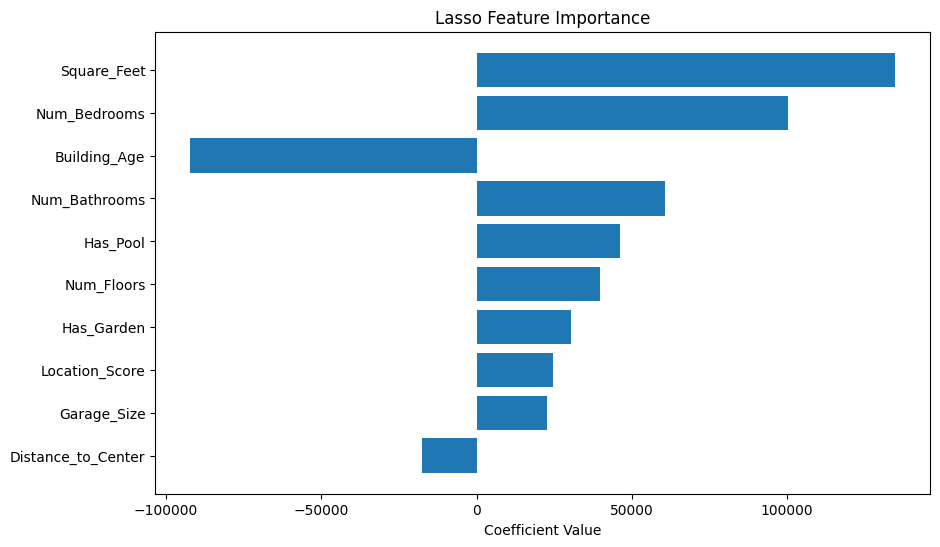

In [ ]:
# alpha에 따른 계수의 변화 시각화
# Visualize coefficient changes across alpha values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

coef = model.coef_
features = X_train.columns

coef_df = pd.DataFrame({'feature': features, 'coef': coef})
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['feature'], coef_df['coef'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 양수: feature가 증가하면 타깃(Price 등)도 증가: ex) Square_Feet, Num_Bedrooms
# 음수: feature가 증가하면 타깃은 감소: ex) Builing_age

# Positive: an increase in the feature leads to an increase in the target (e.g., Price)
#           e.g., Square_Feet, Num_Bedrooms
# Negative: an increase in the feature leads to a decrease in the target
#           e.g., Building_Age